To use this notebook, all you need to do is input your high and low resolution file paths as hr and lr. \ Then, the notebook will do the rest of the work for you– calculating radial profiles, finding densities, and the abel transform.

Note that the proper motion function in header_setup uses the proper motion of Betelgeuse. Change as needed.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

from astropy.io import fits
from astropy import units as u

Match function imported.
running


In [2]:
from everything import full_analysis

Ready to go!


In [3]:
from radial import radial_read
from dens import density_model

In [4]:
from everything import plot_2d

Input your high and low resolution files

In [5]:
hr = 'jan29_data/from_server/Betelgeuse_TE_cont_R0.image.image.tt0.fits'
lr = 'jan29_data/from_server/Betelgeuse_all_cont_1-1.image.image.tt0.fits'
data3, data_1d3, radius3, data_dens_1d3, data_dens_2d3, data_plot3, info3 = full_analysis(hr,lr)
# this should be lr
info3['lr']['kspatres']
# this should be hr


False
First epoch shifted to second.
Header information imported.
Header information imported.


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

Alignment and subtraction complete. Info dictionaries imported.


/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(functio

0.040566339161841755

In [6]:
from everything import plot_1d, plot_1d_err,plot_1d_skip

/Users/iman/Documents/almanalysis/streamlined/everything.py:271: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


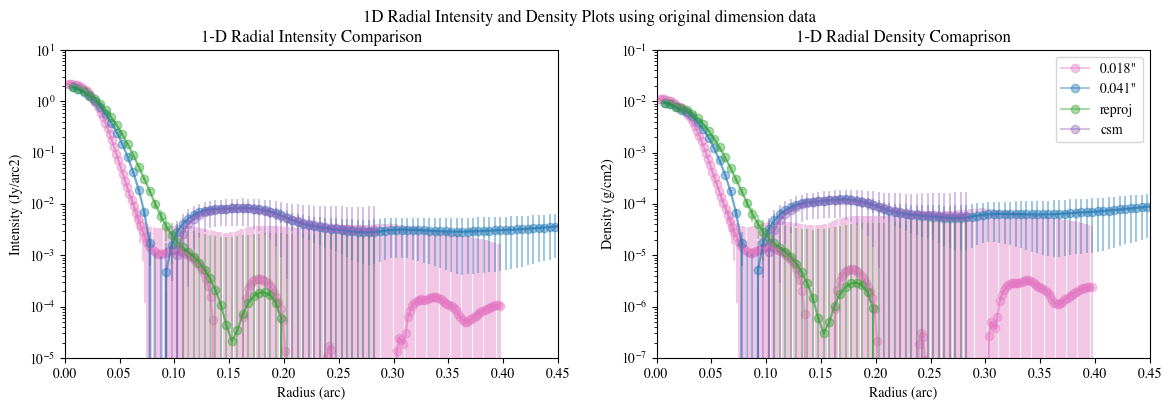

In [7]:
plot_1d(data_1d3, data_dens_1d3,info3,radius3,ax1_ymin=1e-5,ax1_ymax=1e1,ax2_ymin=1e-7,ax2_ymax=1e-1)#,xmax=0.35)
#plot_1d(data_1d3, data_dens_1d3,info3,radius3,ax1_ymin=-1e-1,ax1_ymax=6e5,ax2_ymin=1e0,ax2_ymax=1e1)#,xmax=0.35)

/Users/iman/Documents/almanalysis/streamlined/everything.py:323: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


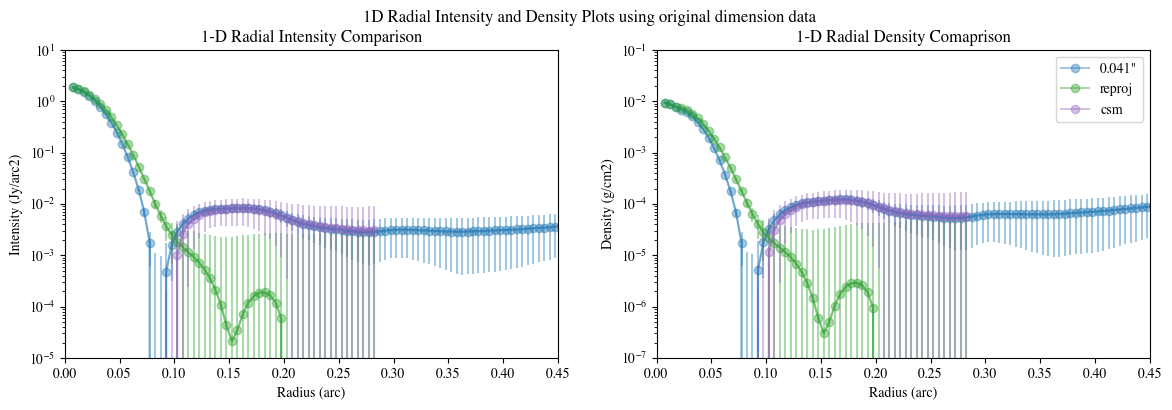

In [8]:
plot_1d_skip(data_1d3, data_dens_1d3,info3,radius3,ax1_ymin=1e-5,ax1_ymax=1e1,ax2_ymin=1e-7,ax2_ymax=1e-1)#,xmax=0.35)

/Users/iman/Documents/almanalysis/streamlined/everything.py:217: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


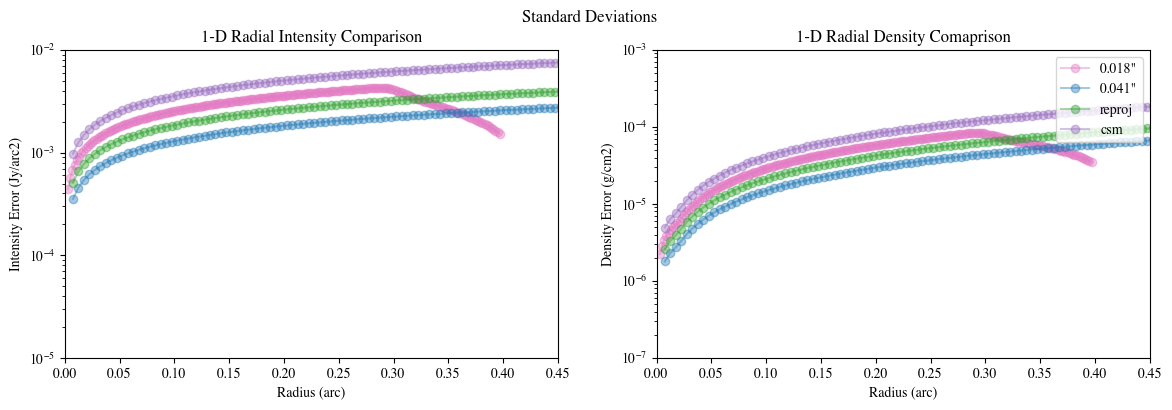

In [9]:
plot_1d_err(info3,radius3,ax1_ymin=1e-5,ax1_ymax=1e-2,ax2_ymin=1e-7,ax2_ymax=1e-3)#,xmax=0.35)


In [10]:
from dens import kappa
from astropy.modeling.models import BlackBody


In [11]:
def max_test(data_1d):
    title = ['hr','lr','reproj','csm']
    lmda_AA = 8.87e6*u.AA
    
    B = BlackBody(temperature = 3000*u.K)
    B=B(lmda_AA)
    arcsec2_per_sr=4.25e10*u.arcsec**2/u.sr
    ergcmshz_per_jy = 1.0e-23*u.erg/u.cm**2/u.s/u.Hz/u.Jy
    k = kappa(887.0*u.um)

    B_jy_arcsec2 = B/arcsec2_per_sr/ergcmshz_per_jy

    sigma={}

    for i in title:
        sigma[i]= np.nanmax(np.nanmax(data_1d[i]))/ (k*B_jy_arcsec2)

    return sigma


In [12]:
max_test(data_1d3)

{'hr': <Quantity 0.01111003 g / cm2>,
 'lr': <Quantity 0.00941045 g / cm2>,
 'reproj': <Quantity 0.0094502 g / cm2>,
 'csm': <Quantity 4.17848432e-05 g / cm2>}

In [13]:
print("hr: ",np.nanmax(data_dens_1d3['hr']))
print("lr: ",np.nanmax(data_dens_1d3['lr']))
print("reproj: ",np.nanmax(data_dens_1d3['reproj']))
print("csm: ",np.nanmax(data_dens_1d3['csm']))

hr:  0.011110034247982424 g / cm2
lr:  0.009410451338716383 g / cm2
reproj:  0.0094502016147055 g / cm2
csm:  0.0001210193479610102 g / cm2


csm, lr and reproj all get mapped to the same thing

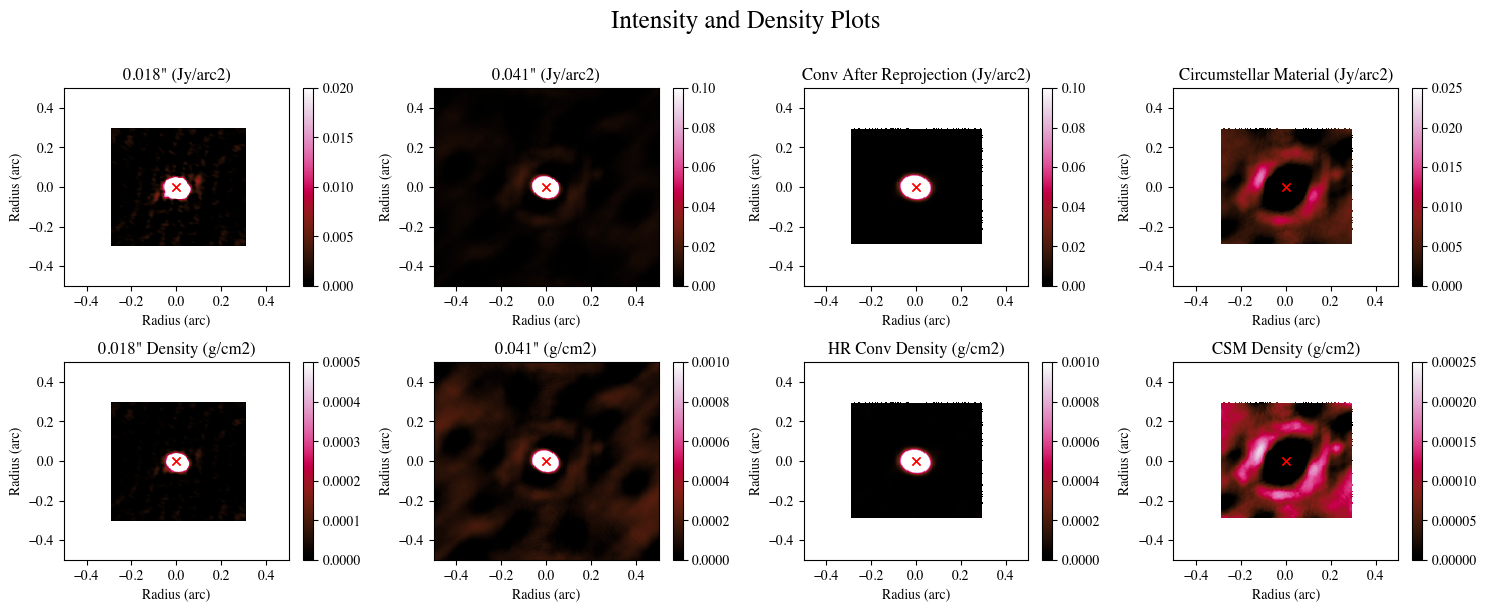

In [14]:
vminmax = [[0,.02], [0,.1],[0,.1],[0,0.025],
           [0,0.0005], [0,0.001],[0,0.001],[0,0.00025]]
plot_2d(data_plot3, info3, vminmax,minn=-.5)

## Abel transform

In [15]:
from abel import all_abel, do_abel, plot_1d_abel

In [16]:
d = {'hr': data_1d3['hr'], 'lr': data_1d3['lr'], 'reproj': data_1d3['reproj'],"csm": data_1d3['csm']}

In [17]:
abels = all_abel(d,radius3)

/Users/iman/Documents/almanalysis/streamlined/abel.py:85: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


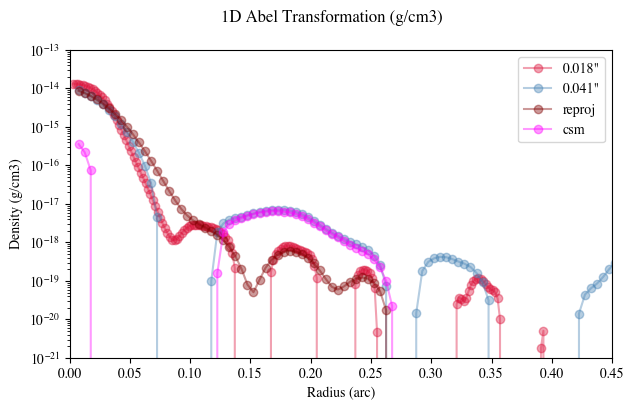

In [18]:
plot_1d_abel(abels,info3,radius3,ax_ymin=1e-21,ax_ymax=1e-13)